**Exercise 8.5.3**. (Computer Experiment)  Generate 100 observations from a $N(0, 1)$ distribution.  Compute a 95 percent confidence band for the CDF $F$.  Repeat this 1000 times and see how often the confidence band contains the true function.  Repeat using data from a Cauchy distribution.

In [160]:
import math
import numpy as np
import pandas as pd
from scipy.stats import norm, cauchy, uniform
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

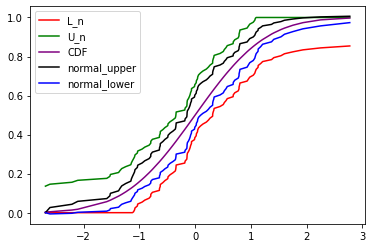

In [167]:
# one iteration with Normal distribution

n=100
alpha=0.05
r=norm.rvs(size=n)
epsilon=np.sqrt((1/(2*n))*np.log(2/alpha))

F=lambda x: sum(r<x)/n
xx=sorted(r)
F_n=np.array(list(map(F,xx)))
L_n=np.maximum(F_n-epsilon,0)
U_n=np.minimum(F_n+epsilon,1)
CDF=np.array(list(map(norm.cdf,xx)))

Sde=np.sqrt((F_n*(1-F_n))/n)
NL=F_n+norm.ppf(alpha)*Sde
NU=F_n-norm.ppf(alpha)*Sde

df=pd.DataFrame({
    'x': xx,
    'F_n': F_n,
    'U_n': U_n,
    'L_n': L_n,
     'CDF': CDF,
    'normal_upper': NU,
    'normal_lower': NL
})
df['in_bounds'] = (df['U_n'] >= df['CDF']) & (df['CDF'] >= df['L_n'])

plt.plot('x','L_n',data=df, color='red')
plt.plot('x','U_n',data=df,color='green')
plt.plot('x','CDF',data=df, color='purple')
plt.plot('x','normal_upper',data=df,color='black')
plt.plot('x','normal_lower',data=df, color='blue')
plt.legend()

In [203]:
# 1000 iterations faster
bounds=[]
normal_bounds=[]
dst=[]
normal_dst=[]
n=100
alpha=0.05
epsilon=np.sqrt((1/(2*n))*np.log(2/alpha))

for k in tqdm(range(1000)):
    r=norm.rvs(size=n)
    
    F=lambda x: sum(r<x)/n
    xx=sorted(r)
    F_n=np.array(list(map(F,xx)))
    L_n=np.maximum(F_n-epsilon,0)
    U_n=np.minimum(F_n+epsilon,1)
    CDF=np.array(list(map(norm.cdf,xx)))

    Sde=np.sqrt((F_n*(1-F_n))/n)
    NL=F_n+norm.ppf(alpha/2)*Sde
    NU=F_n-norm.ppf(alpha/2)*Sde

    df=pd.DataFrame({
        'x': xx,
        'F_n': F_n,
        'U_n': U_n,
        'L_n': L_n,
         'CDF': CDF,
        'normal_upper': NU,
        'normal_lower': NL
    })
    
    all_in_bounds = ((df['U_n']>=df['CDF'])&(df['CDF']>=df['L_n'])).all()
    bounds.append(all_in_bounds)
    all_in_bounds = ((df['normal_upper']>=df['CDF'])&(df['CDF']>=df['normal_lower'])).all()
    normal_bounds.append(all_in_bounds)
    
    d=sum(abs(CDF-L_n))+sum(abs(CDF-U_n))
    dst.append(d)
    d=sum(abs(CDF-NL))+sum(abs(CDF-NU))
    normal_dst.append(d)

print('Average fraction in DKW bounds: %.3f' % np.array(bounds).mean())
print('Average fraction in normal bounds: %.3f' % np.array(normal_bounds).mean())

print('Average distance in DKW bounds: %.1f' % np.array(dst).mean())
print('Average distance in normal bounds: %.1f' % np.array(normal_dst).mean())


Average fraction in DKW bounds: 0.958
Average fraction in normal bounds: 0.000
Average distance in DKW bounds: 25.3
Average distance in normal bounds: 15.6


In [168]:
# 1000 iterations original
bounds=[]
n=100
alpha=0.05
epsilon=np.sqrt((1/(2*n))*np.log(2/alpha))

for k in tqdm(range(1000)):
    r=norm.rvs(size=n)
    
    F_n = lambda x : sum(r < x) / n
    L_n = lambda x : max(F_n(x) - epsilon, 0)
    U_n = lambda x : min(F_n(x) + epsilon, 1)

    # xx = sorted(r)
    xx = r # No need to sort without plotting
    
    df = pd.DataFrame({
        'x': xx, 
        'F_n': np.array(list(map(F_n, xx))), 
        'U_n': np.array(list(map(U_n, xx))), 
        'L_n': np.array(list(map(L_n, xx))), 
        'CDF': np.array(list(map(norm.cdf, xx)))
    })
    
    all_in_bounds = ((df['U_n']>=df['CDF'])&(df['CDF']>=df['L_n'])).all()
    bounds.append(all_in_bounds)

print('Average fraction in bounds: %.3f' % np.array(bounds).mean())
    


Average fraction in bounds: 0.967


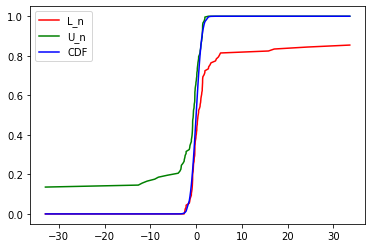

In [73]:
# one iteration with Cauchy distribution

n=100
alpha=0.05
r=cauchy.rvs(size=n)
epsilon=np.sqrt((1/(2*n))*np.log(2/alpha))

F_n=lambda x: sum(r<x)/n
L_n=lambda x: max(F_n(x)-epsilon,0)
U_n=lambda x: min(F_n(x)+epsilon,1)

xx=sorted(r)

df=pd.DataFrame({
    'x': xx,
    'F_n': np.array(list(map(F_n,xx))),
    'U_n': np.array(list(map(U_n,xx))),
    'L_n': np.array(list(map(L_n,xx))),
     'CDF': np.array(list(map(norm.cdf,xx)))   
})
df['in_bounds'] = (df['U_n'] >= df['CDF']) & (df['CDF'] >= df['L_n'])

plt.plot('x','L_n',data=df, color='red')
plt.plot('x','U_n',data=df,color='green')
plt.plot('x','CDF',data=df, color='blue')
plt.legend()

In [74]:
bounds=[]
n=100
alpha=0.05
epsilon=np.sqrt((1/(2*n))*np.log(2/alpha))

for k in tqdm(range(1000)):
    r=cauchy.rvs(size=n)
    
    F_n = lambda x : sum(r < x) / n
    L_n = lambda x : max(F_n(x) - epsilon, 0)
    U_n = lambda x : min(F_n(x) + epsilon, 1)

    # xx = sorted(r)
    xx = r # No need to sort without plotting
    
    df = pd.DataFrame({
        'x': xx, 
        'F_n': np.array(list(map(F_n, xx))), 
        'U_n': np.array(list(map(U_n, xx))), 
        'L_n': np.array(list(map(L_n, xx))), 
        'CDF': np.array(list(map(norm.cdf, xx)))
    })
    
    all_in_bounds = ((df['U_n']>=df['CDF'])&(df['CDF']>=df['L_n'])).all()
    bounds.append(all_in_bounds)

print('Average fraction in bounds: %.3f' % np.array(bounds).mean())
    


Average fraction in bounds: 0.180


**Exercise 8.5.7**.  Data on the magnitudes of earthquakes near Fiji are available on the course website.  

- Estimate the CDF.
- Compute and plot a 95% confidence envelope for F.
- Find an approximate 95% confidence interval for F(4.9) - F(4.3).

In [179]:
import pandas as pd
import numpy as np

data=pd.read_csv('fijiquakes.csv', sep=',')
r=np.array(data['mag'])

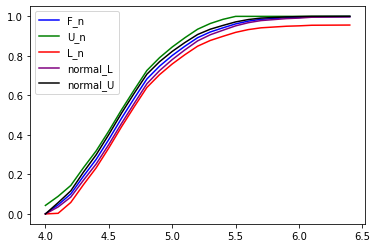

In [150]:
n=len(r)
alpha=0.05
eps=np.sqrt((1/(2*n))*np.log(2/alpha))

F_n=lambda x: sum(r<x)/n
L_n=lambda x: max(F_n(x)-eps,0)
U_n=lambda x: min(F_n(x)+eps,1)
Sde=lambda x: np.sqrt(((sum(r<x)/n)*(1-sum(r<x)/n))/n)
NL=lambda x: F_n(x)+norm.ppf(alpha)*Sde(x)
NU=lambda x: F_n(x)-norm.ppf(alpha)*Sde(x)

xx=sorted(r)

df=pd.DataFrame({
    'x': xx,
    'F_n': np.array(list(map(F_n,xx))),
    'U_n': np.array(list(map(U_n,xx))),
    'L_n': np.array(list(map(L_n,xx))),
    'normal_L': np.array(list(map(NL,xx))),
    'normal_U': np.array(list(map(NU,xx)))
}
)

plt.plot('x','F_n', data=df, color='blue')
plt.plot('x','U_n',data=df, color='green')
plt.plot('x','L_n',data=df, color='red')
plt.plot('x','normal_L',data=df,color='purple')
plt.plot('x','normal_U',data=df,color='black')
plt.legend()
plt.show()

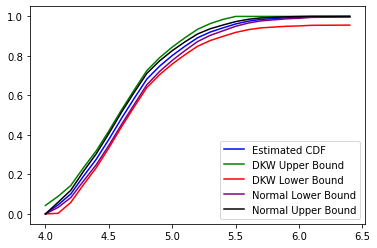

In [180]:
#faster

n=len(r)
alpha=0.05
eps=np.sqrt((1/(2*n))*np.log(2/alpha))

F=lambda x: sum(r<x)/n

xx=np.array(sorted(r))

F_n=np.array(list(map(F,xx)))
L_n=np.maximum(F_n-eps,0)
U_n=np.minimum(F_n+eps,1)
Sde=np.sqrt((F_n*(1-F_n))/n)
NL=F_n+norm.ppf(alpha/2)*Sde
NU=F_n-norm.ppf(alpha/2)*Sde

plt.plot(xx,F_n, color='blue', label='Estimated CDF')
plt.plot(xx,U_n, color='green', label='DKW Upper Bound')
plt.plot(xx,L_n, color='red',label='DKW Lower Bound')
plt.plot(xx,NL,color='purple', label='Normal Lower Bound')
plt.plot(xx,NU,color='black', label='Normal Upper Bound')
plt.legend()

In [183]:
z_95=norm.ppf(1-alpha/2)
theta=F(4.9)-F(4.3)
se=np.sqrt(theta*(1-theta)/n)
u=theta+z_95*se
l=theta-z_95*se

print('95%% confidence interval: (%.3f, %.3f)' % (l, u))

95% confidence interval: (0.526, 0.588)


**Exercise 8.5.8**.  Get the data on eruption times and waiting times between eruptions of the old faithful geyser from the course website.

- Estimate the mean waiting time and give a standard error for the estimate.
- Also, give a 90% confidence interval for the mean waiting time.
- Now estimate the median waiting time.

In the next chapter we will see how to get the standard error for the median.

In [196]:
data=pd.read_csv('geysers.csv', sep=',')
r=np.array(data['waiting'])
n=len(r)
mu=r.mean()
se=r.std()/np.sqrt(n)

print("Estimated mean: %.3f" % mu)
print("Estimated SE: %.3f" % se)

Estimated mean: 70.897
Estimated SE: 0.823


In [197]:
z_90=norm.ppf(.95)
u=mu+z_90*se
l=mu-z_90*se
print('90%% confidence interval: (%.3f,%.3f)' %(l,u))

90% confidence interval: (69.544,72.250)


In [200]:
median=np.median(r)
print('estimated median: %.3f' %median)

estimated median: 76.000


**Exercise 8.5.9**.  100 people are given a standard antibiotic to treat an infection and another 100 are given a new antibiotic.  In the first group, 90 people recover; in the second group, 85 people recover.  Let $p_1$ be the probability of recovery under the standard treatment, and let $p_2$ be the probability of recovery under the new treatment.  We are interested in estimating $\theta = p_1 - p_2$.  Provide an estimate, standard error, an 80% confidence interval and a 95% confidence interval for $\theta$.

In [201]:
p1=0.9
p2=0.85
n=100

theta=p1-p2
se=np.sqrt(p1*(1-p1)/n+p2*(1-p2)/n)

print('estimated mean: %.3f' %theta)
print('standard error: %.3f' %se)

estimated mean: 0.050
standard error: 0.047


In [202]:
z80=norm.ppf(.9)
z95=norm.ppf(.975)

print('80%% CI: (%.3f, %.3f)' %(theta-z80*se, theta+z80*se))
print('95%% CI: (%.3f, %.3f)' %(theta-z95*se, theta+z95*se))

80% CI: (-0.010, 0.110)
95% CI: (-0.041, 0.141)


**Exercise 8.5.10**. In 1975, an experiment was conducted to see if cloud seeding produced rainfall.  26 clouds were seeded with silver nitrate and 26 were not.  The decision to seed or not was made at random.  Get the data from the provided link.

Let $\theta$ be the difference in the median precipitation from the two groups.

- Estimate $\theta$.
- Estimate the standard error of the estimate and produce a 95% confidence interval.